In [98]:
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn import pipeline, model_selection, metrics, compose, preprocessing
from sklearn import linear_model, feature_extraction

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [89]:
df = pd.read_csv("../data/Churn_Modelling.csv")
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [90]:
## missing values

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Explore

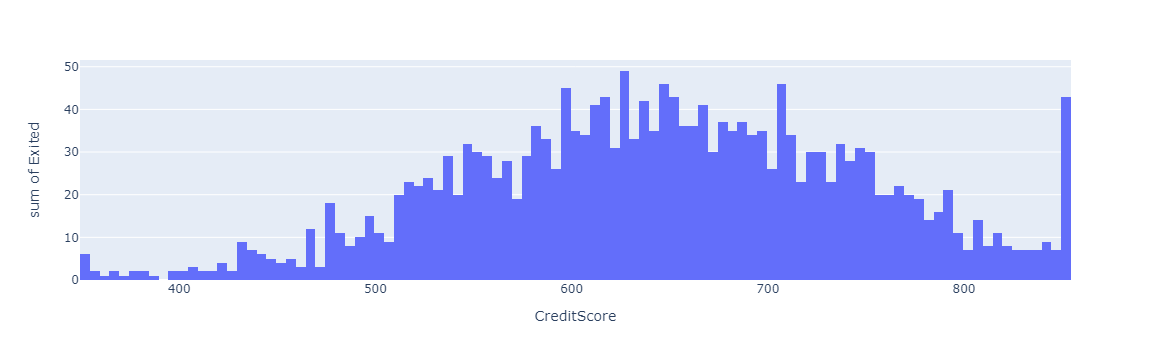

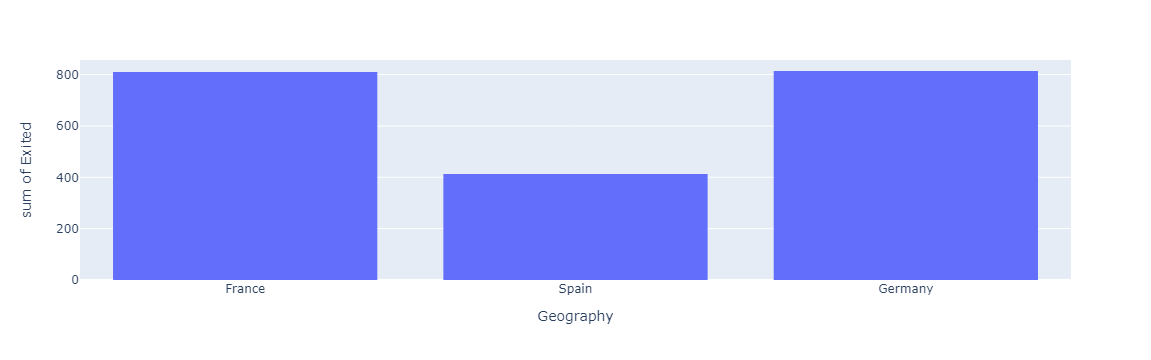

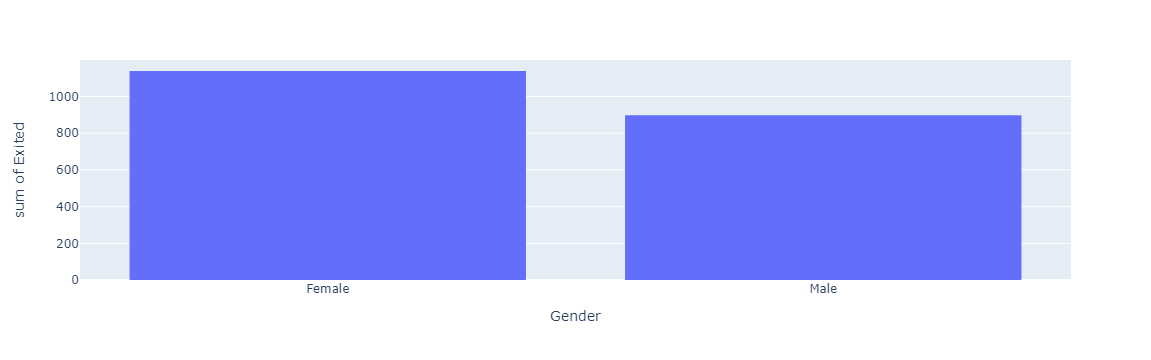

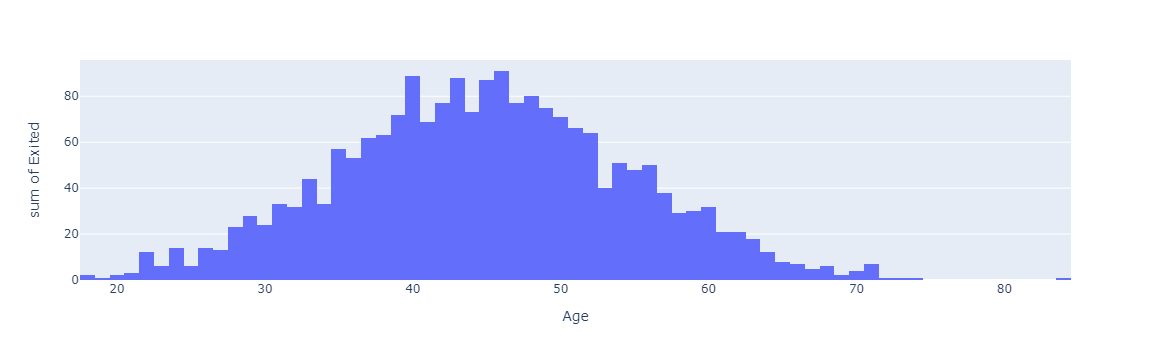

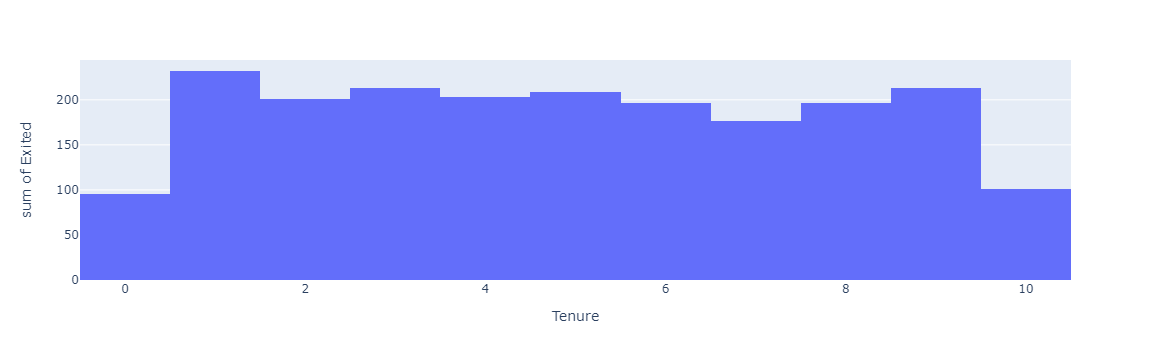

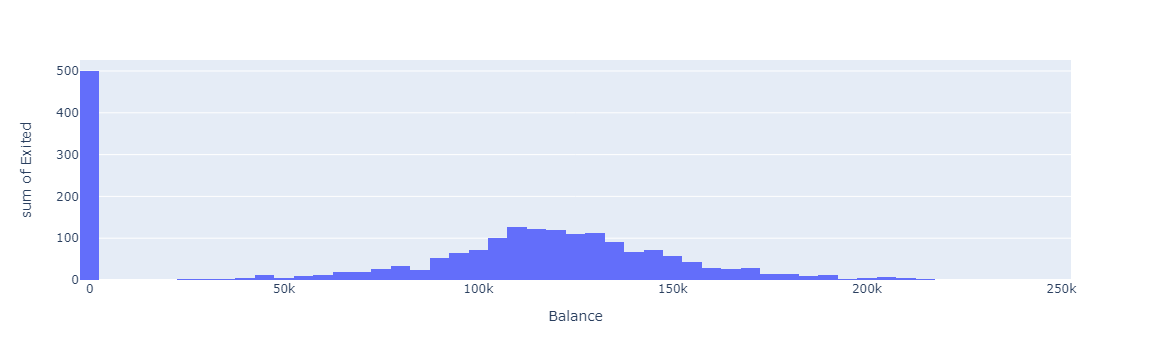

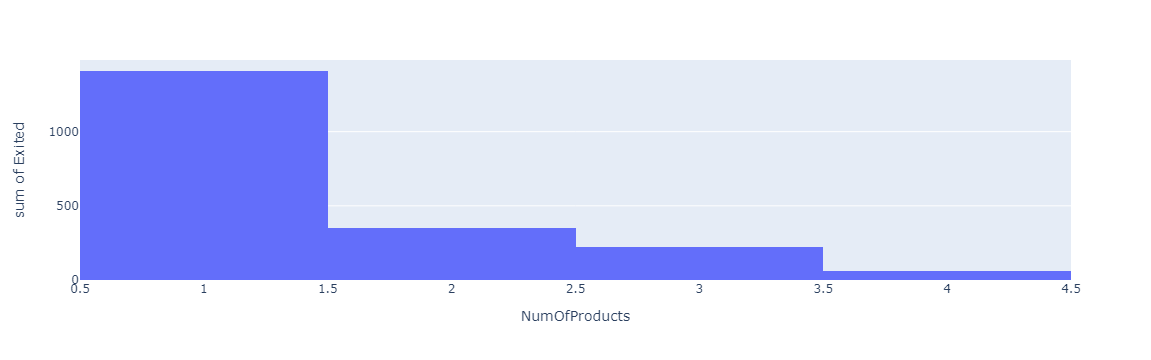

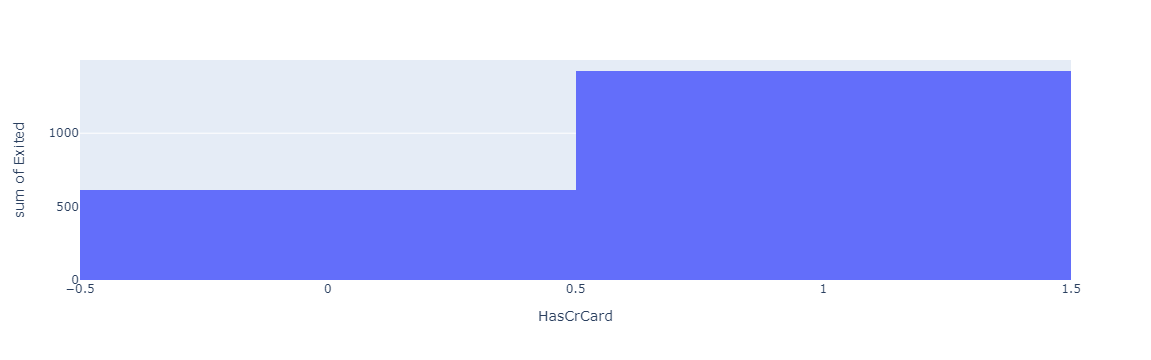

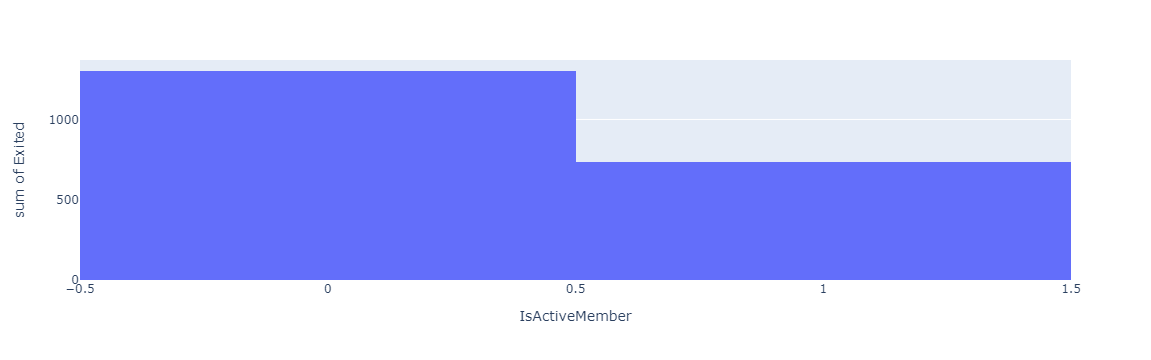

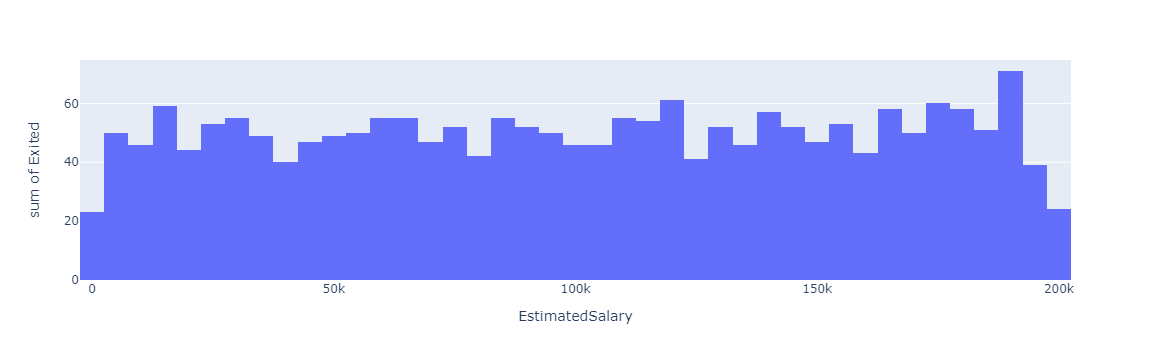

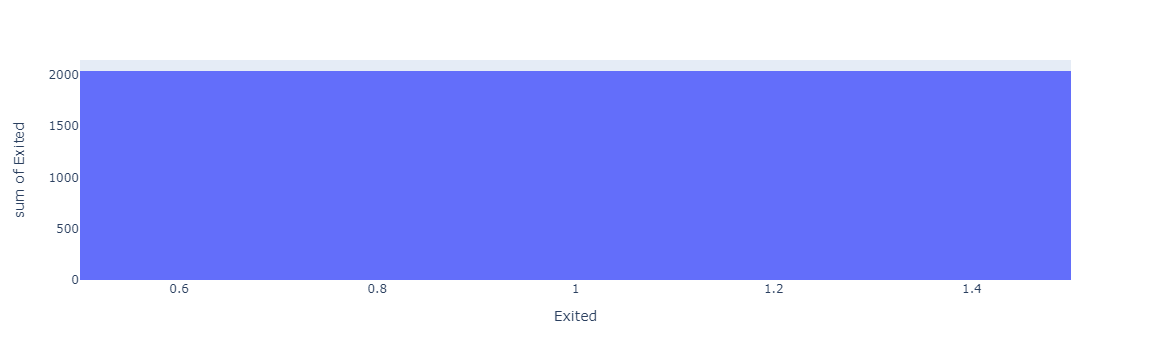

In [91]:
cols = df.columns.tolist()

for c in cols:
    px.histogram(df, c, "Exited").show()

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

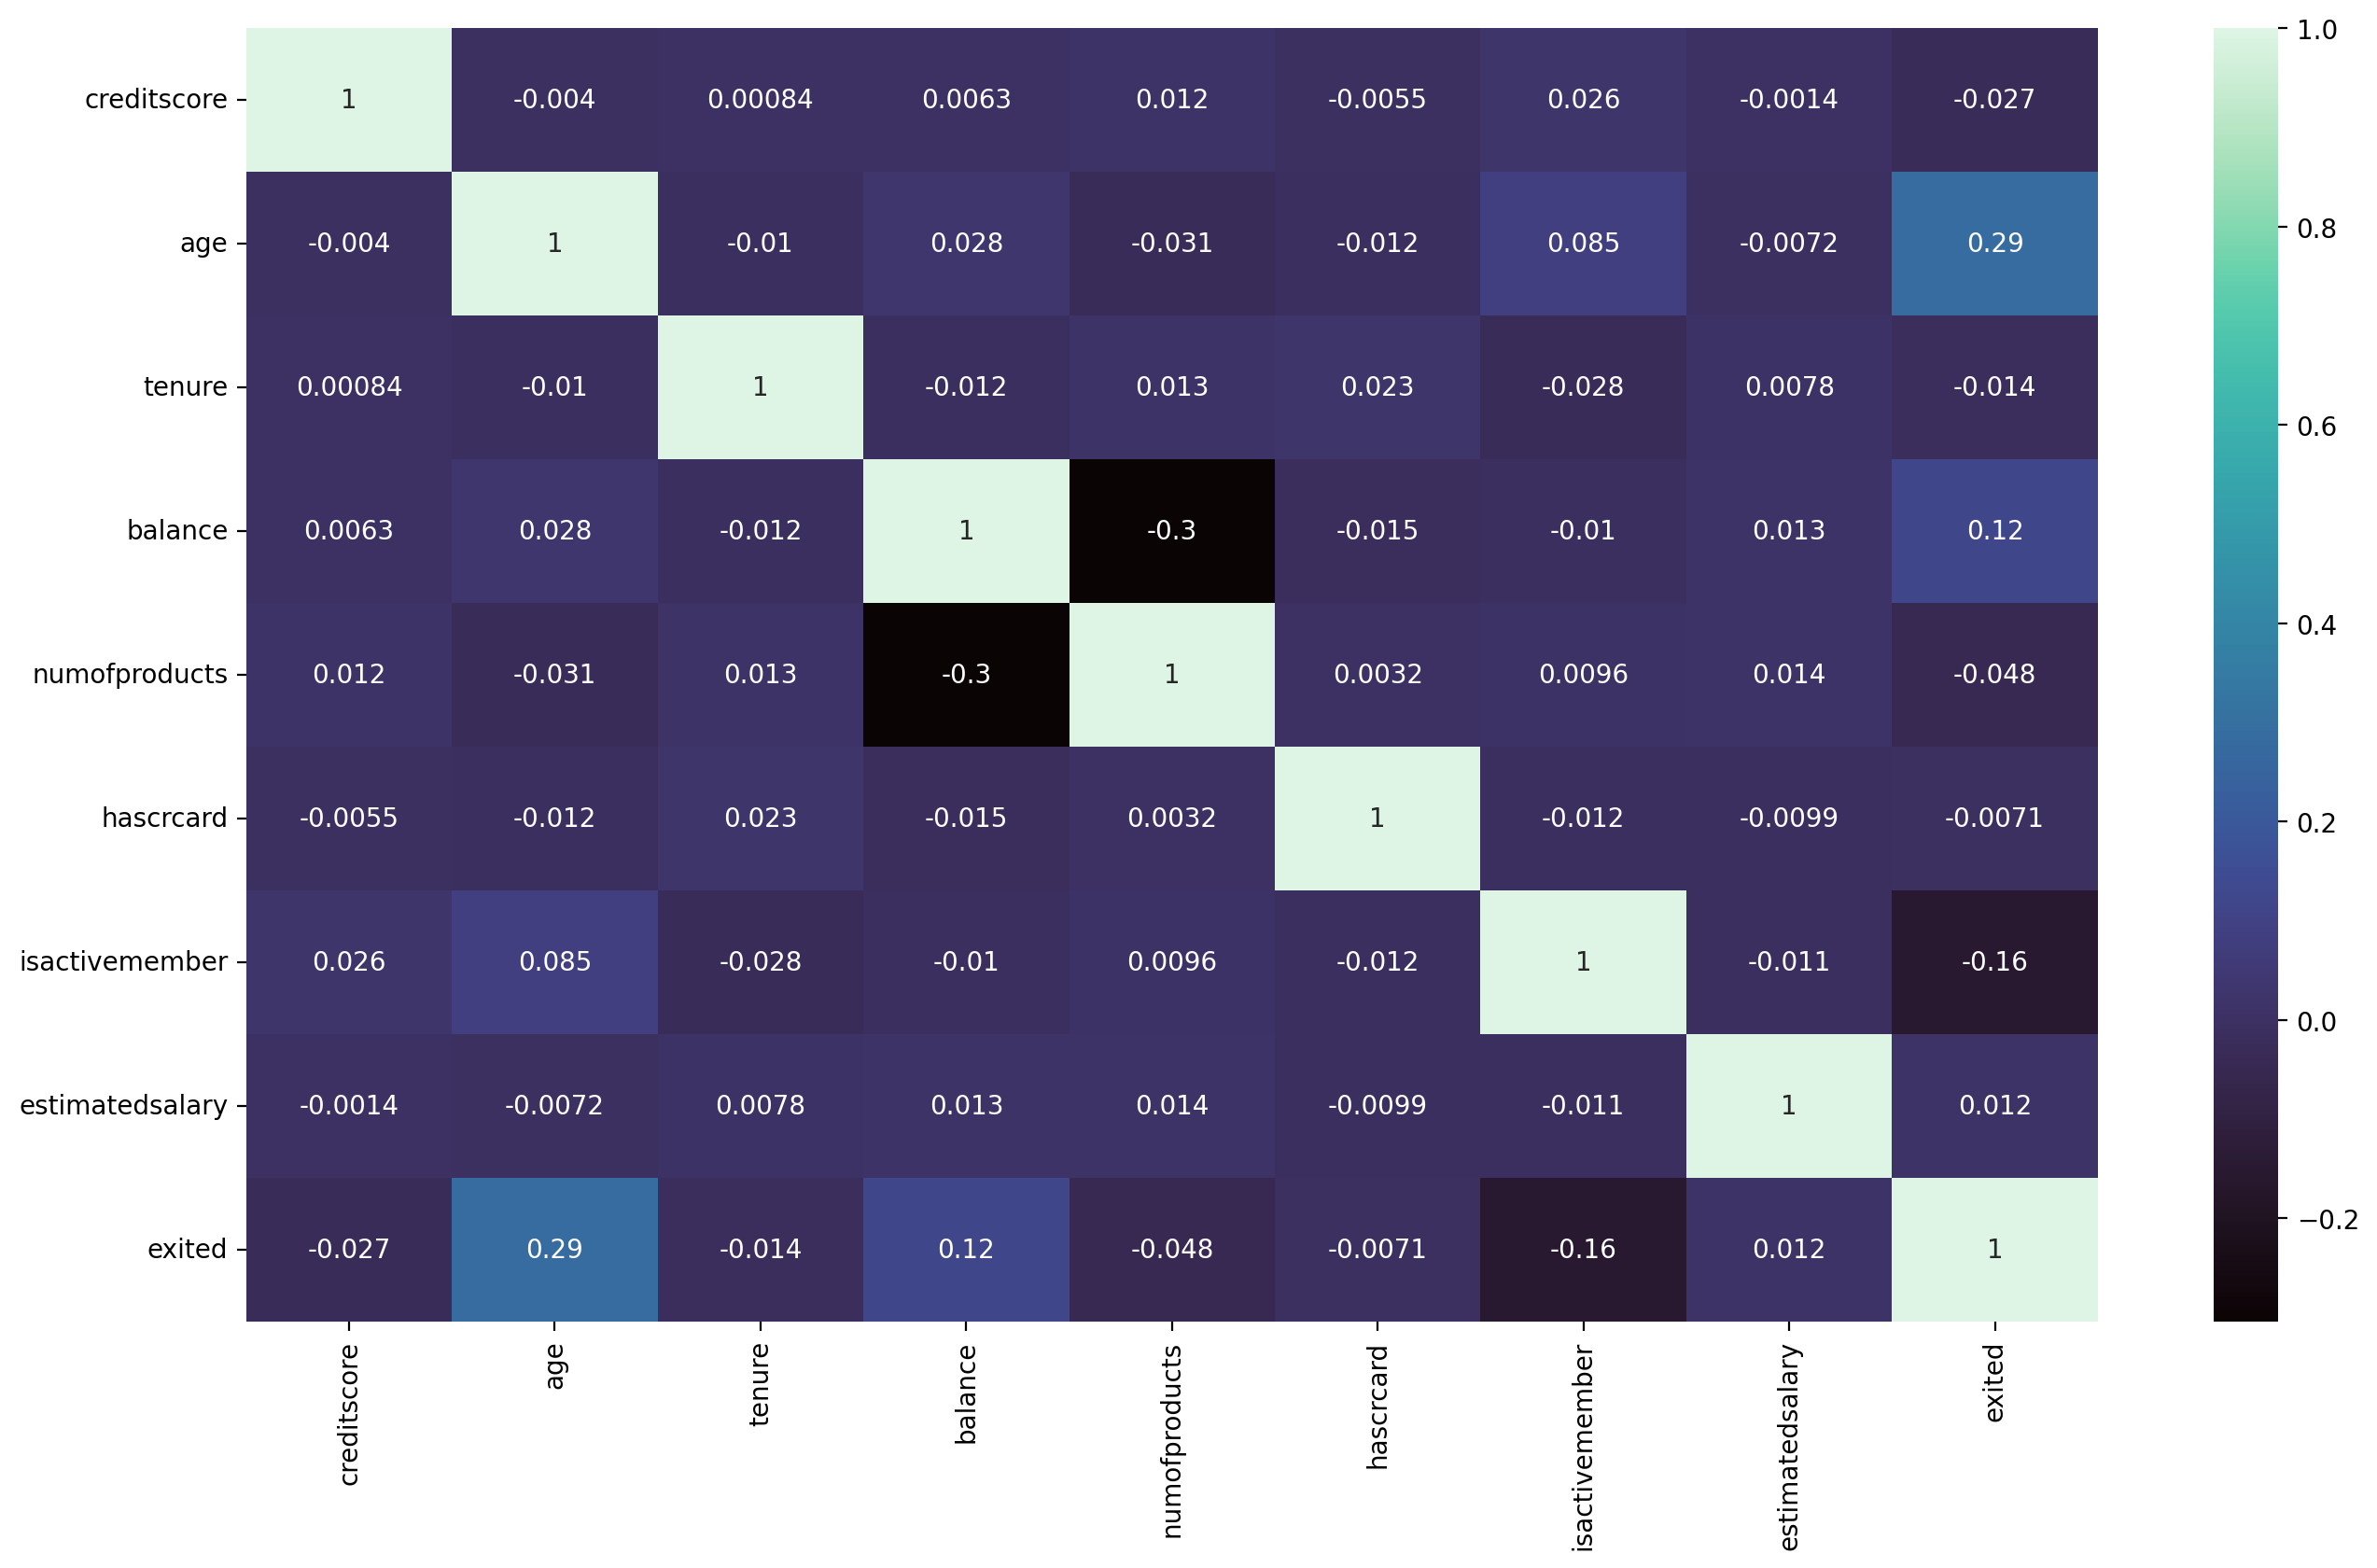

In [127]:
plt.figure(figsize=(16, 9), dpi=200)
sns.heatmap(df.corr(), cmap="mako", annot=True)
plt.show()

# Modelling

In [111]:
df.columns = df.columns.str.lower()

X = df.drop(columns="exited")
y = df["exited"]

cat_cols = X.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    df[col] = df[col].str.lower().replace(" ", "_")

num_cols = X.select_dtypes(exclude="object").columns.tolist()

In [112]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [113]:
# standartize features

num_cols = X_train.select_dtypes(exclude="object").columns.tolist()

scaler = preprocessing.StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

dv = feature_extraction.DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient="records")
test_dict = X_test.to_dict(orient="records")

train_dict = dv.fit_transform(train_dict)
test_dict = dv.transform(test_dict)

In [114]:
pd.DataFrame(train_dict, columns=dv.feature_names_)

age   balance  creditscore  estimatedsalary  gender=female  \
0     1.231507  0.984013    -1.233003         1.093678            0.0   
1     0.096379  0.273876     1.099272         0.399502            1.0   
2     0.947725  0.318756     0.779358         1.567179            1.0   
3     0.001785 -1.226437     0.325287         1.241721            0.0   
4     0.947725  0.846163     0.603921         1.615957            0.0   
...        ...       ...          ...              ...            ...   
7995 -0.471185  0.738469     0.810317         0.671527            0.0   
7996  0.190973 -1.226437     1.924855        -0.328228            1.0   
7997  1.893665  1.506727    -0.087505        -1.181626            0.0   
7998 -0.187403  0.324470    -0.345500        -0.026529            1.0   
7999  3.123387 -1.226437     0.366566        -0.867371            1.0   

      gender=male  geography=france  geography=germany  geography=spain  \
0             1.0               0.0                1.0              0.0   
1             0.0               0.0                0.0              1.0   
2             0.0               0.0                0.0              1.0   
3             1.0               1.0                0.0              0.0   
4             1.0               0.0                1.0              0.0   
...           ...               ...                ...              ...   
7995          1.0               1.0                0.0              0.0   
7996          0.0               0.0                0.0              1.0   
7997          1.0               0.0                1.0              0.0   
7998          0.0               1.0                0.0              0.0   
7999          0.0               0.0                0.0              1.0   

      hascrcard  isactivemember  numofproducts    tenure  
0      0.642401       -1.037711      -0.915223  1.373655  
1     -1.556661       -1.037711       0.811612 -0.011165  
2      0.642401       -1.037711      -0.915223  0.681245  
3      0.642401       -1.037711       0.811612 -0.357370  
4      0.642401        0.963660      -0.915223  1.719860  
...         ...             ...            ...       ...  
7995   0.642401       -1.037711       0.811612 -0.011165  
7996   0.642401       -1.037711       0.811612 -0.011165  
7997   0.642401        0.963660      -0.915223 -0.703575  
7998   0.642401       -1.037711      -0.915223 -0.011165  
7999   0.642401        0.963660       0.811612 -0.357370  

[8000 rows x 13 columns]

In [120]:
results = model_selection.cross_validate(
    linear_model.LogisticRegression(),
    train_dict,
    y_train,
    cv=10,
    return_train_score=True,
)

In [122]:
pd.DataFrame(results).mean()

fit_time       0.035500
score_time     0.000946
test_score     0.813125
train_score    0.813417
dtype: float64

# Techniques to deal with Imbalanced Dataset
- Data-level
    - Resampling
        - Over-Sampling (Upsampling)
        - SMOTE
        - Under-Sampling (Downsampling)
        - Tomek links
      
- Model-level
    - class-weight
    - tree-based models
    - under-sampling + ensemble (all minority + some majority for every model)
    - 
    
        